In [14]:
import pandas as pd
import numpy as np

In [15]:
pwd

'/Users/defoezhange/Documents/Predictive Model'

In [16]:
cd /Users/defoezhange/Documents/Predictive Model

/Users/defoezhange/Documents/Predictive Model


In [17]:
data = pd.read_csv('Predictive Model Data - COMBINED 16-19 ELA.csv')
data.head()

,Student_ID,Grade,RIT,Winter_AP,Fall_AP,Projected_Level,Actual_Level
0,1000011,8,191,3,3,1,1
1,1000012,8,212,32,32,2,1
2,1000029,7,215,45,45,2,3
3,1000031,6,218,60,60,3,3
4,1000033,7,208,28,28,2,5


In [18]:
dummies = pd.get_dummies(data.Grade)

In [19]:
dummies.head()

,3,4,5,6,7,8
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [20]:
data_with_dummies = pd.concat([data, dummies], axis = 'columns')
data_with_dummies.head()

,Student_ID,Grade,RIT,Winter_AP,Fall_AP,Projected_Level,Actual_Level,3,4,5,6,7,8
0,1000011,8,191,3,3,1,1,0,0,0,0,0,1
1,1000012,8,212,32,32,2,1,0,0,0,0,0,1
2,1000029,7,215,45,45,2,3,0,0,0,0,1,0
3,1000031,6,218,60,60,3,3,0,0,0,1,0,0
4,1000033,7,208,28,28,2,5,0,0,0,0,1,0


In [21]:
cols = [1, 2, 7]
data_dummies = data_with_dummies.drop(data_with_dummies.columns[cols],axis = 1)
data_dummies = data_dummies.rename({4:"Grade_4", 5:"Grade_5", 6:"Grade_6", 7:"Grade_7", 8:"Grade_8"}, 
                                   axis = 'columns')
data_dummies = data_dummies[['Student_ID', 'Grade_4', 'Grade_5', 'Grade_6', 'Grade_7', 'Grade_8', 
                             'Fall_AP', 'Winter_AP', 'Projected_Level', 'Actual_Level']]
data_dummies.head()

,Student_ID,Grade_4,Grade_5,Grade_6,Grade_7,Grade_8,Fall_AP,Winter_AP,Projected_Level,Actual_Level
0,1000011,0,0,0,0,1,3,3,1,1
1,1000012,0,0,0,0,1,32,32,2,1
2,1000029,0,0,0,1,0,45,45,2,3
3,1000031,0,0,1,0,0,60,60,3,3
4,1000033,0,0,0,1,0,28,28,2,5


In [22]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [23]:
y = data_dummies['Actual_Level']

In [24]:
X = data_dummies.drop(['Student_ID', 'Projected_Level', 'Actual_Level'], axis=1)
X['Fall_AP'], X['Winter_AP'] = X['Fall_AP']/100, X['Winter_AP']/100
X.head()

,Grade_4,Grade_5,Grade_6,Grade_7,Grade_8,Fall_AP,Winter_AP
0,0,0,0,0,1,0.03,0.03
1,0,0,0,0,1,0.32,0.32
2,0,0,0,1,0,0.45,0.45
3,0,0,1,0,0,0.60,0.60
4,0,0,0,1,0,0.28,0.28


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
model = SVC()

In [28]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
pred_svm = model.predict(X_test)

In [31]:
print(confusion_matrix(y_test,pred_svm))
print('\n')
print(classification_report(y_test,pred_svm))

[[17 38 16  1  0]
 [10 40 57 12  0]
 [ 4 20 72 55  0]
 [ 0  5 38 93  0]
 [ 0  0  1 18  0]]


              precision    recall  f1-score   support

           1       0.55      0.24      0.33        72
           2       0.39      0.34      0.36       119
           3       0.39      0.48      0.43       151
           4       0.52      0.68      0.59       136
           5       0.00      0.00      0.00        19

    accuracy                           0.45       497
   macro avg       0.37      0.35      0.34       497
weighted avg       0.43      0.45      0.43       497



/Users/defoezhange/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
pred_NB = model.predict(X_test)

In [35]:
print(confusion_matrix(y_test,pred_NB))
print('\n')
print(classification_report(y_test,pred_NB))

[[41 22  8  1  0]
 [44 30 33 12  0]
 [11 20 59 60  1]
 [ 2 12 30 74 18]
 [ 0  0  1  9  9]]


              precision    recall  f1-score   support

           1       0.42      0.57      0.48        72
           2       0.36      0.25      0.30       119
           3       0.45      0.39      0.42       151
           4       0.47      0.54      0.51       136
           5       0.32      0.47      0.38        19

    accuracy                           0.43       497
   macro avg       0.40      0.45      0.42       497
weighted avg       0.43      0.43      0.42       497



# K-Nearest Neighbors

In [36]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

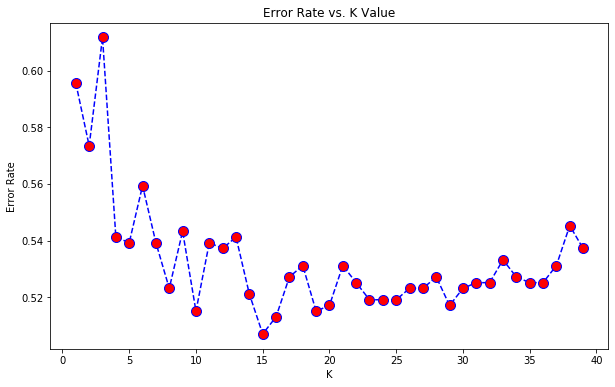

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [39]:
# NOW WITH K=15
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print('WITH K=15')
print('\n')
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

WITH K=15


[[23 39  9  1  0]
 [10 61 36 12  0]
 [ 2 23 74 52  0]
 [ 0 10 40 84  2]
 [ 0  0  1 15  3]]


              precision    recall  f1-score   support

           1       0.66      0.32      0.43        72
           2       0.46      0.51      0.48       119
           3       0.46      0.49      0.48       151
           4       0.51      0.62      0.56       136
           5       0.60      0.16      0.25        19

    accuracy                           0.49       497
   macro avg       0.54      0.42      0.44       497
weighted avg       0.51      0.49      0.49       497



In [69]:
knn_pred_res = pd.DataFrame(data=knn_pred)

In [70]:
knn_pred_res.to_csv(r'/Users/defoezhange/Documents/Predictive Model/knn_pred_res_ELA.csv', index = True)
X_test.to_csv(r'/Users/defoezhange/Documents/Predictive Model/X_test_ELA.csv', index = True)
y_test.to_csv(r'/Users/defoezhange/Documents/Predictive Model/y_test_ELA.csv', index = True)

/Users/defoezhange/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dtree = DecisionTreeClassifier()

In [42]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
dtree_pred = dtree.predict(X_test)

In [44]:
print(confusion_matrix(y_test,dtree_pred))
print('\n')
print(classification_report(y_test,dtree_pred))

[[36 24 11  1  0]
 [26 45 39  9  0]
 [12 28 54 52  5]
 [ 2 18 44 52 20]
 [ 0  1  0 10  8]]


              precision    recall  f1-score   support

           1       0.47      0.50      0.49        72
           2       0.39      0.38      0.38       119
           3       0.36      0.36      0.36       151
           4       0.42      0.38      0.40       136
           5       0.24      0.42      0.31        19

    accuracy                           0.39       497
   macro avg       0.38      0.41      0.39       497
weighted avg       0.40      0.39      0.39       497



# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier(n_estimators=200)

In [52]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
rfc_pred = rfc.predict(X_test)

In [54]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[31 28 12  1  0]
 [13 47 44 15  0]
 [ 4 31 52 60  4]
 [ 1 13 32 76 14]
 [ 0  0  1 10  8]]


              precision    recall  f1-score   support

           1       0.63      0.43      0.51        72
           2       0.39      0.39      0.39       119
           3       0.37      0.34      0.36       151
           4       0.47      0.56      0.51       136
           5       0.31      0.42      0.36        19

    accuracy                           0.43       497
   macro avg       0.43      0.43      0.43       497
weighted avg       0.44      0.43      0.43       497



In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
params = {
    'n_estimators': 20,
    'max_depth': 1,
    'learning_rate': 1,
    'criterion': 'mse'
}

In [58]:
gbc = GradientBoostingClassifier(**params)
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_test)

In [59]:
print(confusion_matrix(y_test,gbc_pred))
print('\n')
print(classification_report(y_test,gbc_pred))

[[28 30 13  1  0]
 [19 47 40 13  0]
 [ 1 22 77 51  0]
 [ 0  9 37 90  0]
 [ 0  0  0 19  0]]


              precision    recall  f1-score   support

           1       0.58      0.39      0.47        72
           2       0.44      0.39      0.41       119
           3       0.46      0.51      0.48       151
           4       0.52      0.66      0.58       136
           5       0.00      0.00      0.00        19

    accuracy                           0.49       497
   macro avg       0.40      0.39      0.39       497
weighted avg       0.47      0.49      0.47       497



/Users/defoezhange/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# After SMOTE

In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_sample(X_train,y_train)

In [62]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))
print("Before OverSampling, counts of label '3': {}".format(sum(y_train==3)))
print("Before OverSampling, counts of label '4': {}".format(sum(y_train==4)))


print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res==3)))
print("After OverSampling, counts of label '4': {}".format(sum(y_train_res==4)))



Before OverSampling, counts of label '1': 147
Before OverSampling, counts of label '2': 278
Before OverSampling, counts of label '3': 350
Before OverSampling, counts of label '4': 333
After OverSampling, counts of label '1': 350
After OverSampling, counts of label '2': 350
After OverSampling, counts of label '3': 350
After OverSampling, counts of label '4': 350


In [63]:
svm = SVC()

In [64]:
svm.fit(X_train_res,y_train_res)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
pred_svm = svm.predict(X_test)

print(confusion_matrix(y_test,pred_svm))
print('\n')
print(classification_report(y_test,pred_svm))

[[50 18  3  1  0]
 [52 23 32 12  0]
 [13 18 62 44 14]
 [ 4  8 27 47 50]
 [ 0  0  1  2 16]]


              precision    recall  f1-score   support

           1       0.42      0.69      0.52        72
           2       0.34      0.19      0.25       119
           3       0.50      0.41      0.45       151
           4       0.44      0.35      0.39       136
           5       0.20      0.84      0.32        19

    accuracy                           0.40       497
   macro avg       0.38      0.50      0.39       497
weighted avg       0.42      0.40      0.39       497



In [66]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_res,y_train_res)
pred_knn = knn.predict(X_test)

print('WITH K=15')
print('\n')
print(confusion_matrix(y_test,pred_knn))
print('\n')
print(classification_report(y_test,pred_knn))

WITH K=15


[[51 17  4  0  0]
 [49 35 23 12  0]
 [22 23 53 41 12]
 [ 9 13 32 39 43]
 [ 0  0  1  5 13]]


              precision    recall  f1-score   support

           1       0.39      0.71      0.50        72
           2       0.40      0.29      0.34       119
           3       0.47      0.35      0.40       151
           4       0.40      0.29      0.33       136
           5       0.19      0.68      0.30        19

    accuracy                           0.38       497
   macro avg       0.37      0.46      0.38       497
weighted avg       0.41      0.38      0.38       497

